# DAMASK tutorial
- creating necessary inputs for damask
- runing the damask jobs

here more option is given to the user to select from damask python package itself.

## Importing libraries and creatign Project

In [1]:
from pyiron_continuum import Project
from damask import Rotation

In [2]:
pr = Project("damask_proj")

In [3]:
pr.remove_jobs_silently(recursive=True)

## Creating the Damask job

In [4]:
job = pr.create.job.DAMASK("damask_job")

## Creating the necessary inputs

### Homogenization

In [5]:
homogenization = pr.create.DAMASK.homogenization(method='SX', 
                                                 parameters={'N_constituents': 1,
                                                             "mechanical": {"type": "pass"}})

In [6]:
homogenization = pr.continuum.damask.Homogenization(method='SX', 
                                                     parameters={'N_constituents': 1,
                                                                 "mechanical": {"type": "pass"}})

### Elasticity

In [7]:
elasticity = pr.continuum.damask.Elasticity(type= 'Hooke', C_11= 106.75e9,
                                   C_12= 60.41e9, C_44=28.34e9)

### Plasticity

In [8]:
plasticity = pr.continuum.damask.Plasticity(N_sl=[12], a_sl=2.25, 
                                   atol_xi=1.0, dot_gamma_0_sl=0.001,
                                   h_0_sl_sl=75e6, h_sl_sl=[1, 1, 1.4, 1.4, 1.4, 1.4],
                                   n_sl=20, output=['xi_sl'], type='phenopowerlaw',
                                   xi_0_sl=[31e6], xi_inf_sl=[63e6])           

### Phase

In [9]:
phase = pr.continuum.damask.Phase(composition='Aluminum', lattice= 'cF',
                         output_list=['F', 'P', 'F_e', 'F_p', 'L_p', 'O'],
                         elasticity=elasticity, plasticity=plasticity)

### Rotation

In [10]:
rotation = pr.continuum.damask.Rotation(Rotation.from_random, 10)

### Material

In [11]:
material = pr.continuum.damask.Material([rotation],['Aluminum'], phase, homogenization)

In [12]:
job.material = material

### Grid

In [13]:
grid = pr.continuum.damask.Grid.via_voronoi_tessellation(box_size=1., grid_dim=4, num_grains=10)

In [14]:
job.grid = grid

### Loading

In [15]:
load_step =[{'mech_bc_dict':{'dot_F':[1e-3,0,0, 0,'x',0,  0,0,'x'],
                            'P':['x','x','x', 'x',0,'x',  'x','x',0]},
            'discretization':{'t': 10.,'N': 40},
            'additional': {'f_out': 4}
           },{'mech_bc_dict':{'dot_F':[1e-3,0,0, 0,'x',0,  0,0,'x'],
                              'P':['x','x','x', 'x',0,'x',  'x','x',0]},
            'discretization':{'t': 60.,'N': 60},
            'additional': {'f_out': 4}
           }]

In [16]:
solver = job.list_solvers()[0]

In [17]:
job.loading = pr.continuum.damask.Loading(solver=solver, load_steps=load_step)

## Runing the job

In [18]:
job.run()

The job damask_job was saved and received the ID: 1


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


In [19]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,1,finished,None,damask_job,/damask_job,/home/muhammad/,workspace/tmp/damask_tests/damask_proj/,2021-10-15 00:51:40.019162,2021-10-15 00:51:44.016029,3.0,pyiron@cmleo14#1,DAMASK,0.4,None,None


## Post-processing

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$\\varepsilon_z$$_z$', ylabel='$\\sigma_z$$_z$(Pa)'>)

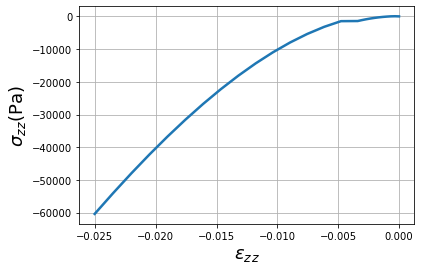

In [20]:
job.plot_stress_strain(component='zz')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$\\varepsilon_{vM}$', ylabel='$\\sigma_{vM}$ (Pa)'>)

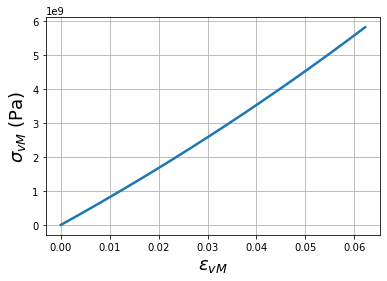

In [21]:
job.plot_stress_strain(von_mises=True)

In [22]:
job.output.damask.view(increments=80)


increment_80 (50.0s)
  phase
    Aluminum
      mechanical
        F / 1: deformation gradient
        F_e / 1: elastic deformation gradient
        F_p / 1: plastic deformation gradient
        L_p / 1/s: plastic velocity gradient
        O / q_0 (q_1 q_2 q_3): crystal orientation as quaternion
        P / Pa: first Piola-Kirchhoff stress
        avg_sigma / Pa: average stress (formula: np.average(#sigma#, axis=0))
        avg_sigma_vM / Pa: average stress VM (formula: np.average(#sigma_vM#))
        avg_strain / : average strain (formula: np.average(#epsilon_V^0.0(F)#, axis=0))
        avg_strain_vM / : average strain vM (formula: np.average(#epsilon_V^0.0(F)_vM#))
        epsilon_V^0.0(F) / 1: strain tensor of F (deformation gradient)
        epsilon_V^0.0(F)_vM / 1: Mises equivalent strain of epsilon_V^0.0(F) (strain tensor of F (deformation gradient))
        sigma / Pa: Cauchy stress calculated from P (first Piola-Kirchhoff stress) and F (deformation gradient)
        sigma_vM /

In [23]:
job.output.stress

array([[[ 8.00420474e-06,  1.39588888e-07, -7.33218121e-07],
        [ 1.39588888e-07,  6.93473093e-06,  5.99086292e-07],
        [-7.33218121e-07,  5.99086292e-07,  8.35255459e-06]],

       [[ 7.13057905e+07, -2.37476623e+05,  1.85522156e+05],
        [-2.37476623e+05,  1.58040649e+02, -9.93611512e+05],
        [ 1.85522156e+05, -9.93611512e+05,  4.01062264e+01]],

       [[ 1.42924670e+08, -4.75280935e+05,  3.71406474e+05],
        [-4.75280935e+05,  1.85063506e+01, -1.98615140e+06],
        [ 3.71406474e+05, -1.98615140e+06,  1.10952616e+01]],

       [[ 2.14857766e+08, -7.13418512e+05,  5.57658920e+05],
        [-7.13418512e+05, -4.67552322e+01, -2.97762485e+06],
        [ 5.57658920e+05, -2.97762485e+06, -6.91403296e+01]],

       [[ 2.87106077e+08, -9.51888954e+05,  7.44278258e+05],
        [-9.51888954e+05, -1.30802842e+02, -3.96803515e+06],
        [ 7.44278258e+05, -3.96803515e+06, -1.73965486e+02]],

       [[ 3.59670617e+08, -1.19069339e+06,  9.31265044e+05],
        [-1.19